In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os
import random
import shutil
import matplotlib.image as mpimg
from PIL import Image

In [47]:
class_names = ['Caballo', 'Mariposa', 'Perro', 'Aranha', 'Ardilla', 'Elefante', 'Gallina', 'Gato', 'Oveja', 'Vaca']

In [48]:

for label in class_names:
# Ruta de la carpeta con las imágenes originales
    carpeta_origen = os.path.join("./Animales/", label)
    # Rutas de las carpetas destino
    carpeta_train = "./train_set/"+ label
    carpeta_test = "./test_set/"+ label
    carpeta_val = "./val_set/"+ label

    # Crear las carpetas destino si no existen
    os.makedirs(carpeta_train, exist_ok=True)
    os.makedirs(carpeta_test, exist_ok=True)
    os.makedirs(carpeta_val, exist_ok=True)

    # Listar todas las imágenes en la carpeta origen
    imagenes = [f for f in os.listdir(carpeta_origen) if os.path.isfile(os.path.join(carpeta_origen, f))]

    # Barajar las imágenes aleatoriamente
    random.shuffle(imagenes)

    # Dividir las imágenes en tres grupos
    grupo_1 = imagenes[:400]  
    grupo_2 = imagenes[400:450] 
    grupo_3 = imagenes[450:] 
    # Mover las imágenes a las carpetas destino
    for img in grupo_1:
        shutil.copy(os.path.join(carpeta_origen, img), os.path.join(carpeta_train, img))

    for img in grupo_2:
        shutil.copy(os.path.join(carpeta_origen, img), os.path.join(carpeta_test, img))

    for img in grupo_3:
        shutil.copy(os.path.join(carpeta_origen, img), os.path.join(carpeta_val, img))

In [49]:
ruta='./train_set'

In [50]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
   ruta,
    labels="inferred",   
    batch_size=10,
    image_size=(224, 224),    
)

Found 4000 files belonging to 10 classes.


In [51]:
ruta='./test_set'
test_dataset = tf.keras.utils.image_dataset_from_directory(
   ruta,
    labels="inferred",   
    batch_size=10,
    image_size=(224, 224),    
)

Found 500 files belonging to 10 classes.


In [52]:
ruta='./val_set'
val_dataset = tf.keras.utils.image_dataset_from_directory(
   ruta,
    labels="inferred",   
    batch_size=10,
    image_size=(224, 224),    
)

Found 500 files belonging to 10 classes.


In [4]:
#subset_size = len(subset_dataset)
#train_size = int(0.8 * subset_size)
#subset_dataset = subset_dataset.shuffle(buffer_size=1000, seed=123) 
#train_dataset = subset_dataset.take(train_size)
#test_dataset = subset_dataset.skip(train_size)

In [123]:
#val_size = len(val_dataset)
#test_size = int(0.5 * val_size)
#val_dataset = val_dataset.shuffle(buffer_size=1000, seed=123) 
#val_dataset1 = val_dataset.take(test_size)
#test_dataset = val_dataset.skip(test_size)

In [53]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Congelar las capas base


In [54]:
modelo = keras.Sequential(
    [
    layers.Rescaling(1.0 / 255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
    ]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "./Modelo/clasi_animales.keras",
        save_best_only = True,
        monitor = "val_loss",
        verbose = 1
    )
]

In [55]:
modelo.compile(loss = "sparse_categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics = ["accuracy"])

In [56]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [57]:
modelo.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,  # Validación
    callbacks=callbacks
)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.4615 - loss: 1.6712
Epoch 1: val_loss improved from inf to 0.38225, saving model to ./Modelo/clasi_animales.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 116s 279ms/step - accuracy: 0.4620 - loss: 1.6698 - val_accuracy: 0.9120 - val_loss: 0.3822
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.8794 - loss: 0.4423
Epoch 2: val_loss improved from 0.38225 to 0.23512, saving model to ./Modelo/clasi_animales.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 102s 255ms/step - accuracy: 0.8794 - loss: 0.4422 - val_accuracy: 0.9500 - val_loss: 0.2351
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9128 - loss: 0.2873
Epoch 3: val_loss improved from 0.23512 to 0.18794, saving model to ./Modelo/clasi_animales.keras
400/400 ━━━━━━━━━━━━━━━━━━━━ 97s 242ms/step - accuracy: 0.9129 - loss: 0.2872 - val_accuracy: 0.9520 - val_loss: 0.1879
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9422 - loss: 0.2150


In [58]:
test_loss, test_acc = modelo.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9545 - loss: 0.1434
Test accuracy: 0.952


In [152]:
full_dataset = tf.keras.utils.image_dataset_from_directory(
   ruta,
    labels="inferred",   
    batch_size=32,
    image_size=(224, 224),    
)

Found 5000 files belonging to 10 classes.


In [59]:
train_dataset.class_names

['Aranha',
 'Ardilla',
 'Caballo',
 'Elefante',
 'Gallina',
 'Gato',
 'Mariposa',
 'Oveja',
 'Perro',
 'Vaca']

In [84]:
image_path = './chester.webp'

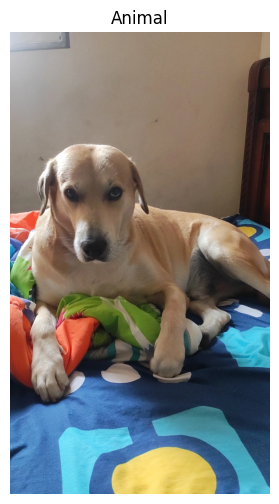

In [85]:
imagen = mpimg.imread(image_path)

# Mostrar la imagen
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.imshow(imagen)  # Mostrar la imagen
plt.axis('off')  # Ocultar los ejes
plt.title("Animal")  # Título opcional
plt.show()

In [86]:
img = Image.open(image_path)

img = img.resize((224, 224))  # Ajusta el tamaño según el modelo

# Convertir la imagen a un array NumPy
img_array = np.array(img)

# Añadir una dimensión extra para representar el batch
img_array = np.expand_dims(img_array, axis=0)

# Normalizar si es necesario (dependiendo del modelo)
img_array = img_array   # Ajusta si tu modelo espera esta normalización

# Realizar la predicción
predictions = modelo.predict(img_array)

# Obtener la clase con la mayor probabilidad
predicted_class_index = np.argmax(predictions[0])

# Mapear el índice a la clase correspondiente (ajusta la lista según tu caso)
class_names2 = train_dataset.class_names  # Cambia por tus clases reales
predicted_class_name = class_names2[predicted_class_index]

print(f"La imagen fue clasificada como: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
La imagen fue clasificada como: Perro


In [74]:
print(predictions[0])

[1.0825614e-04 3.4029680e-04 9.9172944e-01 2.4224685e-04 1.5091654e-03
 1.7653576e-04 1.7419508e-04 6.0886945e-05 5.2618291e-03 3.9713268e-04]


In [38]:
img_array.shape

(1, 224, 224, 3)

In [39]:
predicted_class_index

np.int64(6)

In [51]:
class_names2 =['Aranha',
 'Ardilla',
 'Caballo',
 'Elefante',
 'Gallina',
 'Gato',
 'Mariposa',
 'Oveja',
 'Perro',
 'Vaca']

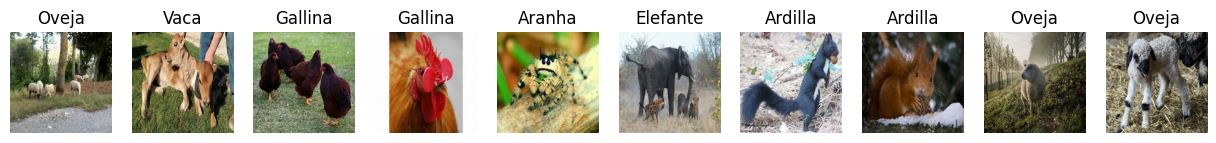

In [58]:
for images, labels in train_dataset.take(1):   
    plt.figure(figsize=(50, 50))  # Define el tamaño de la figura
    for i in range(len(images)):
        plt.subplot(1, 32, i+1)  
        plt.imshow(images[i].numpy().astype("uint8"))  # Mostrar cada imagen
        plt.title(class_names2[labels[i].numpy()])  # Mostrar la etiqueta
        plt.axis('off')  # Ocultar los ejes
    plt.show()

In [40]:
total_et = np.zeros(11)


for images, labels in train_dataset.take(len(train_dataset)):   
        for i in range(len(images)):
            if (class_names[labels[i].numpy()]==class_names[0]):
                total_et[0]=1+total_et[0]
            elif(class_names[labels[i].numpy()]==class_names[1]):
                total_et[1]=1+total_et[1]
            elif(class_names[labels[i].numpy()]==class_names[2]):
                total_et[2]=1+total_et[2]
            elif(class_names[labels[i].numpy()]==class_names[3]):
                total_et[3]=1+total_et[3]
            elif(class_names[labels[i].numpy()]==class_names[4]):
                total_et[4]=1+total_et[4]
            elif(class_names[labels[i].numpy()]==class_names[5]):
                total_et[5]=1+total_et[5]
            elif(class_names[labels[i].numpy()]==class_names[6]):
                total_et[6]=1+total_et[6]
            elif(class_names[labels[i].numpy()]==class_names[7]):
                total_et[7]=1+total_et[7]
            elif(class_names[labels[i].numpy()]==class_names[8]):
                total_et[8]=1+total_et[8]
            elif(class_names[labels[i].numpy()]==class_names[9]):
                 total_et[9]=1+total_et[9]
            else:
                total_et[10]=1+total_et[10]
            

print(total_et)


[400. 400. 400. 400. 400. 400. 400. 400. 400. 400.   0.]


In [69]:
sum(total_et)

np.float64(2073.0)

In [41]:
total_et = np.zeros(11)


for images, labels in val_dataset.take(len(val_dataset)):   
        for i in range(len(images)):
            if (class_names[labels[i].numpy()]==class_names[0]):
                total_et[0]=1+total_et[0]
            elif(class_names[labels[i].numpy()]==class_names[1]):
                total_et[1]=1+total_et[1]
            elif(class_names[labels[i].numpy()]==class_names[2]):
                total_et[2]=1+total_et[2]
            elif(class_names[labels[i].numpy()]==class_names[3]):
                total_et[3]=1+total_et[3]
            elif(class_names[labels[i].numpy()]==class_names[4]):
                total_et[4]=1+total_et[4]
            elif(class_names[labels[i].numpy()]==class_names[5]):
                total_et[5]=1+total_et[5]
            elif(class_names[labels[i].numpy()]==class_names[6]):
                total_et[6]=1+total_et[6]
            elif(class_names[labels[i].numpy()]==class_names[7]):
                total_et[7]=1+total_et[7]
            elif(class_names[labels[i].numpy()]==class_names[8]):
                total_et[8]=1+total_et[8]
            elif(class_names[labels[i].numpy()]==class_names[9]):
                 total_et[9]=1+total_et[9]
            else:
                total_et[10]=1+total_et[10]
            

print(total_et)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50.  0.]


In [42]:
total_et = np.zeros(11)


for images, labels in test_dataset.take(len(test_dataset)):   
        for i in range(len(images)):
            if (class_names[labels[i].numpy()]==class_names[0]):
                total_et[0]=1+total_et[0]
            elif(class_names[labels[i].numpy()]==class_names[1]):
                total_et[1]=1+total_et[1]
            elif(class_names[labels[i].numpy()]==class_names[2]):
                total_et[2]=1+total_et[2]
            elif(class_names[labels[i].numpy()]==class_names[3]):
                total_et[3]=1+total_et[3]
            elif(class_names[labels[i].numpy()]==class_names[4]):
                total_et[4]=1+total_et[4]
            elif(class_names[labels[i].numpy()]==class_names[5]):
                total_et[5]=1+total_et[5]
            elif(class_names[labels[i].numpy()]==class_names[6]):
                total_et[6]=1+total_et[6]
            elif(class_names[labels[i].numpy()]==class_names[7]):
                total_et[7]=1+total_et[7]
            elif(class_names[labels[i].numpy()]==class_names[8]):
                total_et[8]=1+total_et[8]
            elif(class_names[labels[i].numpy()]==class_names[9]):
                 total_et[9]=1+total_et[9]
            else:
                total_et[10]=1+total_et[10]
            

print(total_et)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50.  0.]


In [49]:

test_dataset.class_names



['Aranha',
 'Ardilla',
 'Caballo',
 'Elefante',
 'Gallina',
 'Gato',
 'Mariposa',
 'Oveja',
 'Perro',
 'Vaca']